# Fusion data; Neural Net approach

This notebook covers my attempt at making a neural net to predict fusion experiment results. I will be using Scikit Learn neural nets as they are generally the simplest and best-fitting for what I'm doing; as far as I understand them, the PyTorch neural net methods are better for image classification, which I don't need. 

## Libraries
All the libraries required to run all this code are below.

In [252]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler 
import kagglehub
from timeit import default_timer as timer

## Importing data from Kagglehub
This is the quickest and easiest method for importing data directly from Kagglehub; We need to drop the first column of the dataframe as it is just an indexing column and isn't relevant to the data itself.

In [3]:
path = kagglehub.dataset_download("adebusayoadewunmi/nuclearfusion-data") + '/fusion_experiment.csv'
print("Path to dataset files:", path)
fusion = pd.read_csv(path)
fusion = fusion.drop(['Unnamed: 0'], axis=1)
fusion

Path to dataset files: /home/idies/.cache/kagglehub/datasets/adebusayoadewunmi/nuclearfusion-data/versions/1/fusion_experiment.csv


,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Magnetic Field Configuration,Injection Energy,Beam Symmetry,Target Density,Target Composition,Fuel Density,Temperature,Confinement Time,Fuel Purity,Energy Input,Power Output,Pressure,Neutron Yield,Ignition
0,0.037454,0.058078,0.028259,0.015705,9.000578,tokamak,5.713125,0.800007,2.026963e+19,deuterium,7.612226e+19,4.050388e+08,0.842126,99.971295,250.726719,55.321517,6.107792e+06,5.443404e+10,0
1,0.095071,0.052697,0.045868,0.009551,3.841421,reversed field pinch,9.819548,0.082642,3.050685e+19,deuterium-tritium,8.742441e+19,2.551963e+08,0.504637,99.951049,345.614166,22.767959,4.921946e+06,8.372016e+10,0
2,0.073199,0.035104,0.009922,0.013794,1.467187,stellarator,7.016781,0.176319,5.287388e+19,tritium,8.236610e+19,2.627651e+08,0.357445,99.958831,290.050980,49.872944,9.798230e+06,8.112584e+10,1
3,0.059866,0.049321,0.044684,0.047349,9.277696,tokamak,4.018930,0.833709,5.961305e+19,deuterium-tritium,9.079654e+19,3.104709e+08,0.992195,99.997186,436.491093,2.656182,5.611293e+06,4.423307e+10,1
4,0.015602,0.036510,0.020308,0.088453,4.926347,reversed field pinch,6.145836,0.808161,7.887942e+19,deuterium,8.186142e+19,3.258529e+08,0.648677,99.927054,198.773196,48.096005,8.541064e+06,2.245276e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.079230,0.062215,0.009281,0.075015,6.989681,tokamak,8.363230,0.080241,6.220430e+19,deuterium-tritium,8.029543e+19,3.534515e+08,0.434566,99.917577,130.728901,51.822726,9.611845e+06,6.252602e+10,0
99996,0.077925,0.062922,0.062563,0.027253,9.904975,reversed field pinch,3.718771,0.977716,3.429971e+19,tritium,1.608651e+19,4.554238e+08,0.888713,99.902695,114.869008,9.746068,1.099463e+06,4.545773e+10,0
99997,0.067445,0.019220,0.062666,0.057559,5.389669,tokamak,8.788397,0.374680,4.750184e+19,tritium,3.021016e+19,2.331046e+08,0.323766,99.910285,458.044080,69.116870,7.473165e+06,7.240109e+10,0
99998,0.049945,0.065308,0.004765,0.089334,6.984881,tokamak,3.024949,0.926179,3.030606e+19,deuterium-tritium,4.217068e+19,2.660837e+08,0.646530,99.984932,342.844863,31.591851,6.759779e+06,7.576517e+10,0


## Label Encoding
This section alters the Magnetic Field Configuration and Target Composition columns so that they use integer values instead of strings. 

In [7]:
le = LabelEncoder()
fusion['Magnetic Field Configuration'] = le.fit_transform(fusion['Magnetic Field Configuration']).astype('float64')
fusion['Target Composition'] = le.fit_transform(fusion['Target Composition']).astype('float64')


fusion

,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Magnetic Field Configuration,Injection Energy,Beam Symmetry,Target Density,Target Composition,Fuel Density,Temperature,Confinement Time,Fuel Purity,Energy Input,Power Output,Pressure,Neutron Yield,Ignition
0,0.037454,0.058078,0.028259,0.015705,9.000578,2.0,5.713125,0.800007,2.026963e+19,0.0,7.612226e+19,4.050388e+08,0.842126,99.971295,250.726719,55.321517,6.107792e+06,5.443404e+10,0
1,0.095071,0.052697,0.045868,0.009551,3.841421,0.0,9.819548,0.082642,3.050685e+19,1.0,8.742441e+19,2.551963e+08,0.504637,99.951049,345.614166,22.767959,4.921946e+06,8.372016e+10,0
2,0.073199,0.035104,0.009922,0.013794,1.467187,1.0,7.016781,0.176319,5.287388e+19,2.0,8.236610e+19,2.627651e+08,0.357445,99.958831,290.050980,49.872944,9.798230e+06,8.112584e+10,1
3,0.059866,0.049321,0.044684,0.047349,9.277696,2.0,4.018930,0.833709,5.961305e+19,1.0,9.079654e+19,3.104709e+08,0.992195,99.997186,436.491093,2.656182,5.611293e+06,4.423307e+10,1
4,0.015602,0.036510,0.020308,0.088453,4.926347,0.0,6.145836,0.808161,7.887942e+19,0.0,8.186142e+19,3.258529e+08,0.648677,99.927054,198.773196,48.096005,8.541064e+06,2.245276e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.079230,0.062215,0.009281,0.075015,6.989681,2.0,8.363230,0.080241,6.220430e+19,1.0,8.029543e+19,3.534515e+08,0.434566,99.917577,130.728901,51.822726,9.611845e+06,6.252602e+10,0
99996,0.077925,0.062922,0.062563,0.027253,9.904975,0.0,3.718771,0.977716,3.429971e+19,2.0,1.608651e+19,4.554238e+08,0.888713,99.902695,114.869008,9.746068,1.099463e+06,4.545773e+10,0
99997,0.067445,0.019220,0.062666,0.057559,5.389669,2.0,8.788397,0.374680,4.750184e+19,2.0,3.021016e+19,2.331046e+08,0.323766,99.910285,458.044080,69.116870,7.473165e+06,7.240109e+10,0
99998,0.049945,0.065308,0.004765,0.089334,6.984881,2.0,3.024949,0.926179,3.030606e+19,1.0,4.217068e+19,2.660837e+08,0.646530,99.984932,342.844863,31.591851,6.759779e+06,7.576517e+10,0


## Normalizing data
Normalizing data is the process of simplifying everything so that the values are all as small as possible, thereby making processing easier.

In [8]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(fusion)
fusion = pd.DataFrame(scaled_data, columns=fusion.columns)
fusion

,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Magnetic Field Configuration,Injection Energy,Beam Symmetry,Target Density,Target Composition,Fuel Density,Temperature,Confinement Time,Fuel Purity,Energy Input,Power Output,Pressure,Neutron Yield,Ignition
0,0.374540,0.580783,0.282592,0.157053,0.888952,1.0,0.523681,0.800006,0.114107,0.0,0.734697,0.762599,0.824589,0.712955,0.376815,0.553218,0.567532,0.493704,0.0
1,0.950722,0.526975,0.458685,0.095507,0.315699,0.0,0.979955,0.082602,0.227855,0.5,0.860278,0.387991,0.449594,0.510491,0.614049,0.227680,0.435771,0.819116,0.0
2,0.731998,0.351038,0.099215,0.137938,0.051889,0.5,0.668533,0.176283,0.476379,1.0,0.804074,0.406913,0.286044,0.588316,0.475132,0.498732,0.977582,0.790289,1.0
3,0.598661,0.493215,0.446845,0.473491,0.919744,1.0,0.335435,0.833710,0.551260,0.5,0.897747,0.526178,0.991335,0.971876,0.841257,0.026562,0.512366,0.380356,1.0
4,0.156015,0.365097,0.203084,0.884539,0.436249,0.0,0.571760,0.808160,0.765332,0.0,0.798467,0.564633,0.609641,0.270543,0.246922,0.480962,0.837896,0.138345,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.792310,0.622155,0.092810,0.750152,0.665514,1.0,0.818140,0.080201,0.580052,0.5,0.781067,0.633630,0.371735,0.175771,0.076800,0.518230,0.956872,0.583618,0.0
99996,0.779258,0.629225,0.625644,0.272528,0.989443,0.0,0.302084,0.977725,0.269998,1.0,0.067626,0.888561,0.876353,0.026950,0.037147,0.097461,0.011050,0.393964,0.0
99997,0.674457,0.192202,0.626674,0.575591,0.487731,1.0,0.865381,0.374656,0.416690,1.0,0.224557,0.332762,0.248621,0.102846,0.895143,0.691172,0.719241,0.693344,0.0
99998,0.499448,0.653088,0.047649,0.893344,0.664981,1.0,0.224991,0.926185,0.225624,0.5,0.357454,0.415210,0.607255,0.849331,0.607126,0.315920,0.639975,0.730724,0.0


## Randomized Undersampling
As we found in the previous notebook, this dataset contains a large imbalance of classes in the Ignition column, which is a problem as this column is our target; to correct this, we're going to use a function called a random under sampler. This function essentially looks at the data, checks out what class in the target column is the majority, then removes random rows of data corresponding to that class until there's a better balance between the two classes. This helps us stop the model from overfitting to predicting one type of data, therefore making the model more accurate overall.

In [235]:
#First, we initialise a random under sampler and set it to target the 'majority' class in the target data.
rus = RandomUnderSampler(sampling_strategy = 'majority',
                                         random_state=42)
#We then set the training data columns and the target data column as X and y respectively, then fit those to rus.
X, y = fusion.drop(['Ignition'], axis=1), fusion['Ignition']
X_rus, y_rus = rus.fit_resample(X,y)

#Now, we can move onto the train-test-split.

#Note that this does cause an error report, but this isn't anything we need to worry about for now as it's just
#telling us about a feature that's going to be removed in the next update of the library/

/home/idies/mambaforge/envs/py39/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/home/idies/mambaforge/envs/py39/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


## Train-test-split
Here we are generating and splitting data into training and testing subsets; doing this allows for the model to gather information and then have something to test what it's been taught so that we can check its accuracy. The test size has been set to 30% of the data, meaning the remaining 70% is training data. 

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3,
                                                   random_state=42)

## Initilization of the neural network model
This is, quite simply, the process of creating a neural net class and training it on the data we've produced with the train-test split. For this, we've initialized the model with four hidden layers of neurons, starting at 64 neurons in the first layer and halving the number of neurons in each subsequent layer, down to 8 at the fourth layer. 

In [237]:
pony = MLPClassifier(hidden_layer_sizes=(64, 32, 16, 8),
                    max_iter=1000, random_state=42)

start = timer()
pony.fit(X_train, y_train)
end = timer()
print(f'Training time: {end-start} seconds')

Training time: 7238.203550392762 seconds


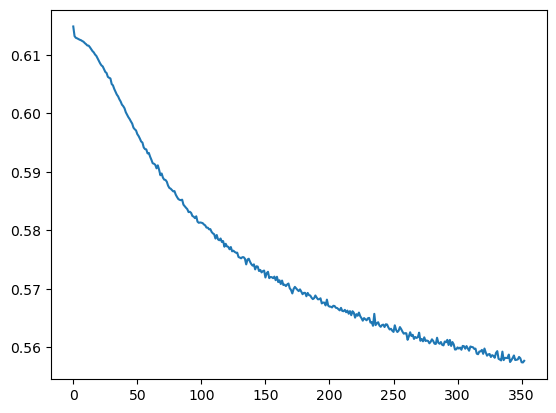

In [124]:
plt.plot(pony.loss_curve_)

## Model Evaluation

### Accuracy scoring
As with notebook one, the first thing we do is check the training and testing accuracy scores of the model, as this is a quick and easy way of judging how well the model is performing based on the comparison between the predictions it's making and the expected results.
Additionally, we look at the mean-squared-error to get an idea of the model's *innacuracy*, i.e. how much the model is missing the mark by.

In [240]:
#We use the .score object to get a rating for the accuracy of the model with respect to X_train and y_train (in the
#case of training accuracy) and with respect to X_test and y_test (in the case of testing accuracy).
train_accuracy = pony.score(X_train, y_train)
test_accuracy = pony.score(X_test, y_test)
#We then use the mean_squared_error function to find the mse between y_train and the prediction made by the model.
mse = mean_squared_error(y_train, pony.predict(X_train))
print(f'train accuracy = {train_accuracy*100:.2f}%')
print(f'test accuracy = {test_accuracy*100:.2f}%')
print(f'mean squared error = {mse}')

train accuracy = 65.55%
test accuracy = 49.94%
mean squared error = 0.3445420028476507


### Classification report
The next step is to look at the classification report for the model; this gives us a more complete look at how well the model is performing in that it tells us four things:
- Precision: The percentage of correct positive predictions relative to the total positive predictions.
- Recall: The percentage of positive predictions relative to total actual positives.
- F1-score: The harmonic mean of precision and recall; the closer the score is to 1, the better.
- Support: The number of occurrences of each class in the dataset.

This is generally more useful than just looking at the accuracy scores as it tells us whether or not the model is correctly predicting each class and by how much. 

In [239]:
#First we get a prediction from the model based on the X_train data.
train_pred = pony.predict(X_train)
#We then generate the classification report, comparing the y_train with the prediction.
class_report = classification_report(y_train, train_pred)
print("MLP classification report:\n", class_report)

MLP classification report:
               precision    recall  f1-score   support

         0.0       0.69      0.57      0.63     21129
         1.0       0.63      0.74      0.68     21011

    accuracy                           0.66     42140
   macro avg       0.66      0.66      0.65     42140
weighted avg       0.66      0.66      0.65     42140



What we're seeing here is that the MLP model is, right off the bat, capable of predicting both ones and zeroes, and that it has decent precision and recall in both the zero and one class, seemingly being more balanced towards predicting ones correctly.
Something to note, however, is that the model takes a whole two hours to run, making it much less effective if you want results particularly quickly.

## Confusion Matrix
A confusion matrix isn't quite as confusing as the name would imply. Essentially, this type of plot takes in a target array and a prediction array and makes a grid based on the classes contained in the arrays - for example, a 2x2 grid for a 2-class prediction - with each box containing the number of correct predictions in boxes where the classes match and false predictions in boxes where the classes *don't* match.
This is an excellent way to check the trends of the predictions, allowing us to see if there's a particular bias towards one prediction or the other, and gives us more information about the data itself than the classification report would.

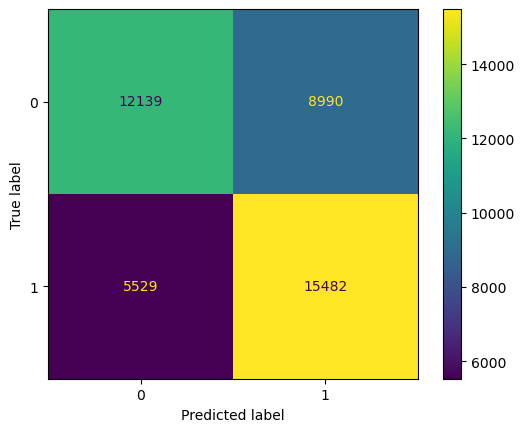

In [253]:
cm = confusion_matrix(y_train, train_pred)
ConfusionMatrixDisplay(cm, display_labels = ['0', '1']).plot()

As indicated by the classification report, we can see that the model has a good degree of success in predicting ones, but not so much with predicting zeroes correctly. We also see that the data seems to be predicting ones more often than zeroes overall - the ratio of predicted ones and zeroes is 1.38510301:1, which isn't an insignificant difference. It's unclear why this distribution exists, as it's likely not a result of overfitting. 

## Comparison with the non-neural-net approach

### Accuracy scores
There are a number of things that are important to discuss when comparing the two models, but we'll start off with just the accuracy scores:

- **Decision tree model**: 

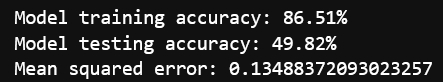

- **MLP model**: 

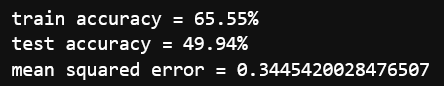

We see here right off the bat that the decision tree model has an accuracy score 20 higher than that of the MLP, though its testing accuracy is about the same as the MLP model; it's important, however, to remember what we discussed in notebook one about how much of the accuracy score can come from the model "correctly" predicting zeroes by *only* predicting zeroes and getting it right by sheer virtue of that. 


### Classification reports
Next is the classification reports:

- **Decision tree model**:

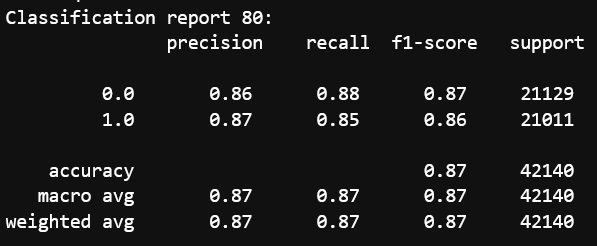

- **MLP model**:

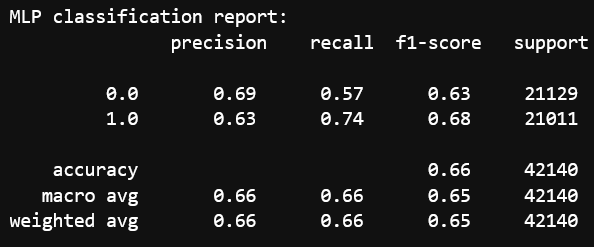


We see here that the MLP model is lower in both the precision and recall scores for both classes, sitting closer to 60-65 on average, whereas the tree model has precision and accuracy scores closer to 85-90 on average. This quite clearly puts the tree as the more favourable model for this task.


### Confusion matrices
Finally, let's compare the confusion matrices of the two models:

- **Decision tree model**:

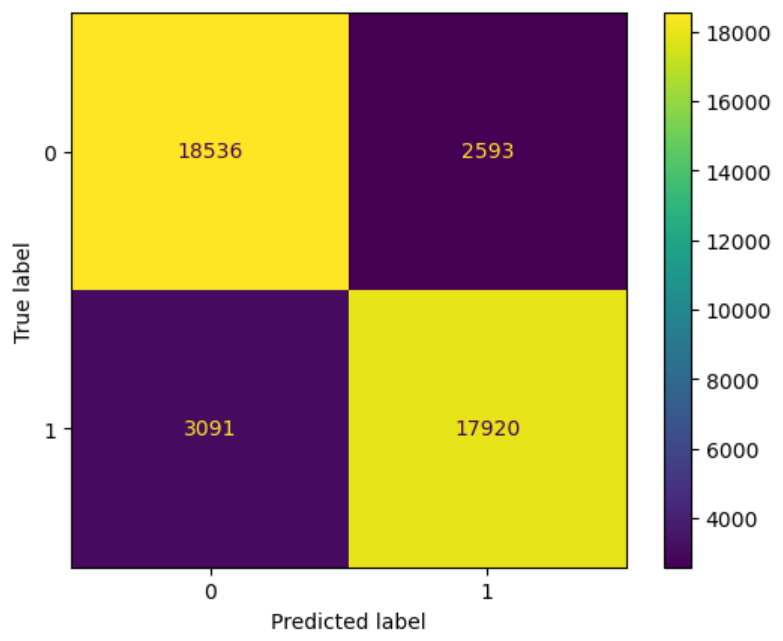

- **MLP model**:

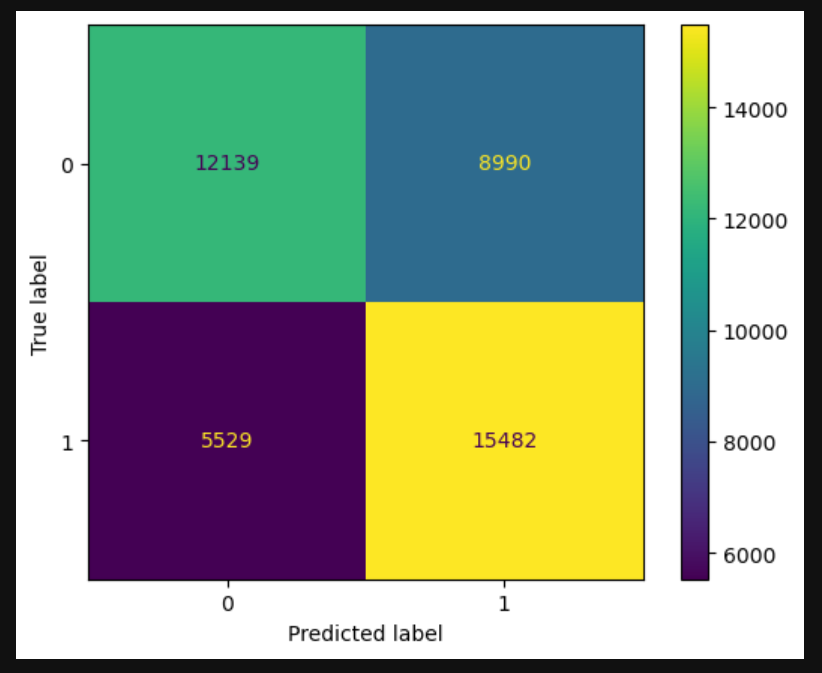


As we can see, the tree model does not suffer from any of the bias that the MLP model appears to be suffering from, hence giving it a higher correct prediction rate for both classes. Whilst it's not perfect, it's still a fair amount better than the neural net. 


It's also important to again note how long the mlp model took to fit the data: having a program that takes even just an hour to run is prohibitive in its use, and this model takes it further by needing two hours to run. This pushes us even further towards using the tree model, which took less than ten seconds to initialize and fit to the data.

## Which model is better overall?

This is quite a clear-cut answer - The tree model is the better of the two for three reasons in particular:

- The tree is generally easier to understand, visualise, and develop further, as we can take what we've learnt from the model and use it to potentially create a random forest classifier.

- The tree has higher precision and recall for both classes than those of the MLP model.

- The tree is much faster to initialise and fit, making it far more accessible. 

Whilst we *could* go back and select different parameters for the neural net, I believe that it would still not be able to beat the tree model due to its prohibitive time consumption and because the potential increase in precision and recall would not be able to catch up to those of the tree model; changing parameters of a neural net rarely has drastic enough of an effect to make it worth the effort.

In [250]:
mfc_arr = []
for i, row in X_train.iterrows():
    s = row['Magnetic Field Configuration']
    if (s == 0):
        mfc_arr.append(0)
    elif (s == 0.5):
        mfc_arr.append(0.5)
    elif (s == 1):
        mfc_arr.append(1)

In [ ]:
targ_arr = []
for i, row in X_train.iterrows():
    s = row['Target Composition']
    if (s == 0):
        targ_arr.append(0)
    elif (s == 0.5):
        targ_arr.append(0.5)
    elif (s == 1):
        targ_arr.append(1)

In [ ]:
#Create arrays for each of the MFCs and TCs, then loop through mfc_arr, targ_arr, and train_pred.
#Append corresponding predictions to the arrays of each MFC and TC, then plot bar graphs for each of them to
#show the comparison of predicted 1s and 0s.

tkmak = []
rfp = []
stlrtr = []

trit = []
deu = []
deu_trit = []


for i in range(len(train_pred)):
    if mfc_arr[i] == 0:
        tkmak.append(train_pred[i])
    elif mfc_arr[i] == 0.5:
        rfp.append(train_pred[i])
    elif mfc_arr[i] == 1:
        stlrtr.append(train_pred[i])

for j in range(len(train_pred)):
    if targ_arr[j] == 0:
        trit.append(train_pred[j])
    if targ_arr[j] == 0.5:
        deu.append(train_pred[j])
    if targ_arr[j] == 1:
        deu_trit.append(train_pred[j])




In [ ]:
Ignition = ['0', '1']
x = np.arange(len(Ignition))
y_train = np.array(y_train)
arrays = [tkmak, rfp, stlrtr]
array_labels = ['tkmak', 'rfp', 'stlrtr']
bar_width = 0.25
index = 0
for array in arrays:
    counters = [0, 0]
    for i in range(len(array)):
        if array[i]==0:
            counters[0]+=1
        if array[i]==1:
            counters[1]+=1
    label = array_labels[index]
    print(counters)
    plt.bar(x - bar_width*index, counters, width = bar_width, label=label)
    index+=1
plt.legend()
plt.xticks(x, Ignition)
plt.xlabel('Ignition')
plt.ylabel('Occurrences')
plt.title('Predicted ignition occurrences for different Magnetic Field Configurations')

In [ ]:
Ignition = ['0', '1']
x = np.arange(len(Ignition))
arrays = [trit, deu, deu_trit]
array_labels = ['tritium', 'deuterium', 'deuterium-tritium']
bar_width = 0.25
index = 0
for array in arrays:
    counters = [0, 0]
    for i in range(len(array)):
        if array[i]==0:
            counters[0]+=1
        if array[i]==1:
            counters[1]+=1
    label = array_labels[index]
    print(counters)
    plt.bar(x - bar_width*index, counters, width = bar_width, label=label)
    index+=1
plt.legend()
plt.xticks(x, Ignition)
plt.xlabel('Ignition')
plt.ylabel('Occurrences')
plt.title('Ignition occurrences for different Target Compositions')